# Final assignment Supervised Machine Learning
- Course: Data Science 3
- Programme: Data Science for Life Sciences 2021-2022
- University: Hanzehogeschool Groningen
- Lecturer: Bart Barnard

By Jan Rombouts

Student number: 439738

# Introduction
This notebook contains a Dysphonic Voice Pattern Analysis of Patients in Parkinson's Disease Using Minimum Interclass Probability Risk Feature Selection and Bagging Ensemble Learning Method.

The dataset was downloaded from: http://archive.ics.uci.edu/ml/datasets/Parkinsons

The data is from the following paper:
_'Exploiting Nonlinear Recurrence and Fractal Scaling Properties for Voice Disorder Detection', 
Little MA, McSharry PE, Roberts SJ, Costello DAE, Moroz IM. 
BioMedical Engineering OnLine 2007, 6:23 (26 June 2007)_ https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5434464/

In [4]:
# Required Pyton libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data

In [5]:
df = pd.read_csv('data/parkinsons.data')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [6]:
# list all variables in df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

# Inspect data

In [7]:
# size of the data
df.shape

(195, 24)

In [8]:
# check how many subjects participated
subs = df.apply(lambda x: x['name'][:-2], axis = 1)
print(subs.unique())
print(len(subs.unique()))

['phon_R01_S01' 'phon_R01_S02' 'phon_R01_S04' 'phon_R01_S05'
 'phon_R01_S06' 'phon_R01_S07' 'phon_R01_S08' 'phon_R01_S10'
 'phon_R01_S13' 'phon_R01_S16' 'phon_R01_S17' 'phon_R01_S18'
 'phon_R01_S19' 'phon_R01_S20' 'phon_R01_S21' 'phon_R01_S22'
 'phon_R01_S24' 'phon_R01_S25' 'phon_R01_S26' 'phon_R01_S27'
 'phon_R01_S31' 'phon_R01_S32' 'phon_R01_S33' 'phon_R01_S34'
 'phon_R01_S35' 'phon_R01_S37' 'phon_R01_S39' 'phon_R01_S42'
 'phon_R01_S43' 'phon_R01_S44' 'phon_R01_S49' 'phon_R01_S50']
32


There are 195 voice recordings of 32 unique subjects

In [9]:
# check if there are participants with divergent number of recordings compared to others
print(f'The minimum recordings per subject is {subs.value_counts().min()}, the maximum is {subs.value_counts().max()}')

The minimum recordings per subject is 6, the maximum is 7


In [10]:
# check whether there is strange data in the status (the y-vector)
df['status'].unique()

array([1, 0], dtype=int64)

In [11]:
# count number of observations in each class
parkinsons, healthy = df['status'].value_counts()
print(f'Number of healthy observations: {healthy}')
print(f'Number of subjects with Parkinsons disease: {parkinsons}')
print('')
print(f'percentage of healthy subjects: {round(healthy / len(df) * 100, 2)}%')
print(f'percentage of subjects with Parkinsons disease: {round(parkinsons / len(df) * 100, 2)}%')

Number of healthy observations: 48
Number of subjects with Parkinsons disease: 147

percentage of healthy subjects: 24.62%
percentage of subjects with Parkinsons disease: 75.38%


All subjects have either 6 or 7 recordings, so none have to be removed due to limited measurements

In [12]:
# check if there are missing data
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [13]:
# check the variances of variables
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


As seen in the table above, the variables have greatly varying means and standard deviation (std)

In [14]:
# draw relations between these features to check whether there are high correlations between any of them.
# skip vars in column 0 (names) and 17 (status) as these are not actual measurements
cols = df.columns.values
cols = np.delete(cols, [0, 17])

<AxesSubplot:>

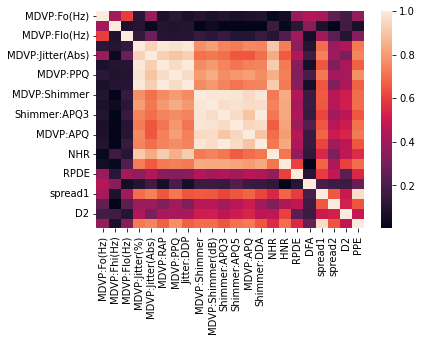

In [15]:
# create a correlation matrix
c = df[cols].corr().abs()
sns.heatmap(c)

The above correlations matrices show high correlation within the "Jitter" features, as well as within the "Shimmer" features.

<AxesSubplot:>

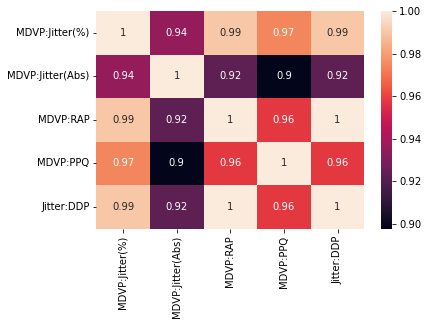

In [16]:
# Plot the paired plots for all variables measuring Jitter
jit_cols = ['MDVP:Jitter(%)', 
               'MDVP:Jitter(Abs)',
               'MDVP:RAP',
               'MDVP:PPQ',
               'Jitter:DDP']

jit_c = df[jit_cols].corr().abs()
sns.heatmap(jit_c,annot=True)

<AxesSubplot:>

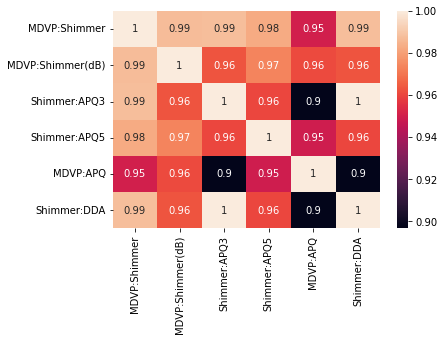

In [17]:
# Plot the paired plots for all variables measuring Jitter
shim_cols = ['MDVP:Shimmer',
                'MDVP:Shimmer(dB)',
                'Shimmer:APQ3',
                'Shimmer:APQ5',
                'MDVP:APQ',
                'Shimmer:DDA']

shim_c = df[shim_cols].corr().abs()
sns.heatmap(shim_c,annot=True)

# Clean data

The correlation matrices above show that the Jitter and Shimmer variables have very high correlations with each other. Consequently, only `MDVP:RAP` for Jitter, and `MDVP:Shimmer` for Shimmer will be included in the model, because these have the highest correlation with the other features in their groups. The other features are dropped:

In [18]:
drop_cols = ['MDVP:Jitter(%)', 
               'MDVP:Jitter(Abs)',
               'MDVP:PPQ',
               'Jitter:DDP',
               'MDVP:Shimmer(dB)',
               'Shimmer:APQ3',
               'Shimmer:APQ5',
               'MDVP:APQ',
               'Shimmer:DDA']

df = df.drop(drop_cols, axis=1)
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:RAP,MDVP:Shimmer,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00370,0.04374,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00465,0.06134,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.00544,0.05233,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00502,0.05492,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.00655,0.06425,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


Now there are 13 features left. To find highly correlated features that were missed, we iterate through the correlations and identify features with correlations over 80%

In [19]:
from Functions import correlation as cor
corr_features = cor.correlation(df, 0.80)
corr_features

{'HNR', 'NHR', 'PPE'}

In [20]:
# check if it is correct to remove these features
df.corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:RAP,MDVP:Shimmer,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.076194,-0.098374,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.097177,0.002281,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.100519,-0.144543,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:RAP,-0.076194,0.097177,-0.100519,1.000000,0.759581,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.759581,1.000000,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
NHR,-0.021981,0.163766,-0.108670,0.919521,0.722194,1.000000,-0.714072,0.189429,0.370890,-0.131882,0.540865,0.318099,0.470949,0.552591
HNR,0.059144,-0.024893,0.210851,-0.721543,-0.835271,-0.714072,1.000000,-0.361515,-0.598736,-0.008665,-0.673210,-0.431564,-0.601401,-0.692876
status,-0.383535,-0.166136,-0.380200,0.266668,0.367430,0.189429,-0.361515,1.000000,0.308567,0.231739,0.564838,0.454842,0.340232,0.531039
RPDE,-0.383894,-0.112404,-0.400143,0.342140,0.447424,0.370890,-0.598736,0.308567,1.000000,-0.110950,0.591117,0.479905,0.236931,0.545886
DFA,-0.446013,-0.343097,-0.050406,0.064083,0.159954,-0.131882,-0.008665,0.231739,-0.110950,1.000000,0.195668,0.166548,-0.165381,0.270445


NHR, HNR, and PPE are highly correlated to different features (and not to each other), so it is okay to remove these three features.

In [21]:
df = df.drop(['HNR','NHR','PPE'], axis=1)
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:RAP,MDVP:Shimmer,status,RPDE,DFA,spread1,spread2,D2
0,phon_R01_S01_1,119.992,157.302,74.997,0.00370,0.04374,1,0.414783,0.815285,-4.813031,0.266482,2.301442
1,phon_R01_S01_2,122.400,148.650,113.819,0.00465,0.06134,1,0.458359,0.819521,-4.075192,0.335590,2.486855
2,phon_R01_S01_3,116.682,131.111,111.555,0.00544,0.05233,1,0.429895,0.825288,-4.443179,0.311173,2.342259
3,phon_R01_S01_4,116.676,137.871,111.366,0.00502,0.05492,1,0.434969,0.819235,-4.117501,0.334147,2.405554
4,phon_R01_S01_5,116.014,141.781,110.655,0.00655,0.06425,1,0.417356,0.823484,-3.747787,0.234513,2.332180


After cleaning, there are 10 features left to create the model.

In [22]:
cols = ['MDVP:Fo(Hz)',
       'MDVP:Fhi(Hz)',
       'MDVP:Flo(Hz)',
       'MDVP:RAP',
       'MDVP:Shimmer',
       'RPDE',
       'DFA',
       'spread1',
       'spread2',
       'D2']

## Split data into training and test set

In [56]:
# Create the X-matrix and the y-vector.
y = np.array(df['status'])
X = np.array(df[cols])

In [57]:
# Normalize because variances are highly different between features
from sklearn.preprocessing import StandardScaler

def normalize(X):
    scalar = StandardScaler()
    scalar = scalar.fit(X)
    X = scalar.transform(X)
    return X

X = normalize(X)

In [58]:
# Split the data in train data and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=14)

# Build model

### Dummy model

In [59]:
# Import function to test different models for the optimal hyperparameters
# Priority for this case is precision, because this voice data was collected mainly from people with already
# observable PD symptoms. Therefore, if this model optimizes recall, it will be as good as possible at identifying
# early stage PD
from Functions import classifier as clas
from Functions import plot_figure as plotter
model = clas.Classifier(X_train, X_test, y_train, y_test, priority='recall')

In [60]:
# First build a simple classifier as a baseline
# Because 75% of the observations has PD, a simple classifier would be to predict everybody to have PD
dum = model.dum_model()

Dummy model metrics:
Confusion matrix: 
 [[ 0 16]
 [ 0 43]]
Accuracy: 0.7288135593220338
Recall: 1.0
F1 Score: 0.8431372549019608
Precision Score: 0.7288135593220338
None


test  acc: 0.7288135593220338
train acc: 0.7647058823529411


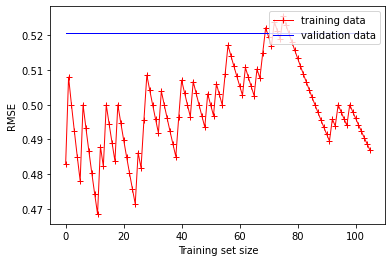

In [61]:
plotter.plot_learning_curves(dum, X_train, y_train, X_test, y_test)

# Upsampling

The current dataset has PD and healthy controls in a ratio of 3:1. This will likely cause overfitting of the data during machine learning. This is why we will upsample the healthy controls using SMOTE in the training set so the data becomes balanced. For this, the imbalanced-learn package is used!

In [62]:
print(f'Original training shape {X_train.shape}')
print(f'y_train PD: {(y_train == 1).sum()}')
print(f'y_train healthy: {(y_train == 0).sum()}')

Original training shape (136, 10)
y_train PD: 104
y_train healthy: 32


In [63]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [64]:
print(f'Resampled dataset shape {X_train.shape}')
print(f'y_train PD: {(y_train == 1).sum()}')
print(f'y_train healthy: {(y_train == 0).sum()}')

Resampled dataset shape (208, 10)
y_train PD: 104
y_train healthy: 104


### Decision Tree

In [65]:
# Decision Tree
dtr = model.dtr_model()

Decision Tree Classifier metrics:

The best depth for Decision Tree is 2
Confusion matrix: 
 [[ 9  7]
 [ 2 41]]
Accuracy: 0.847457627118644
Recall: 0.9534883720930233
F1 Score: 0.9010989010989011
Precision Score: 0.8541666666666666
None


test  acc: 0.7288135593220338
train acc: 0.8557692307692307


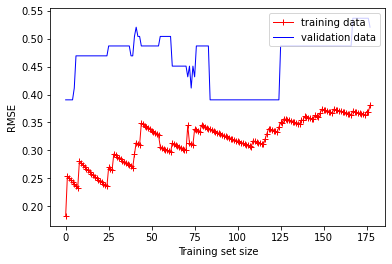

In [66]:
plotter.plot_learning_curves(dtr, X_train, y_train, X_test, y_test)

### Logistic regression

Logistic regression model metrics:

The optimal log model C score is: 1
Confusion matrix: 
 [[ 9  7]
 [ 2 41]]
Accuracy: 0.847457627118644
Recall: 0.9534883720930233
F1 Score: 0.9010989010989011
Precision Score: 0.8541666666666666
None


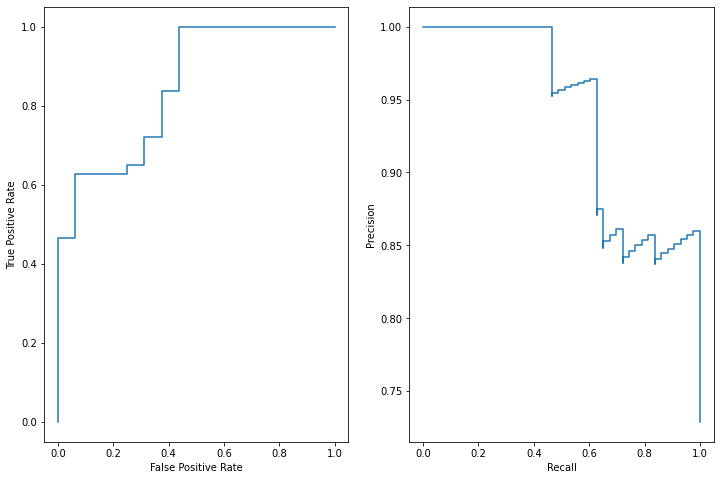

In [67]:
# Logistic Regression
log = model.log_model()
model.ROC_curve(log)

test  acc: 0.7796610169491526
train acc: 0.8557692307692307


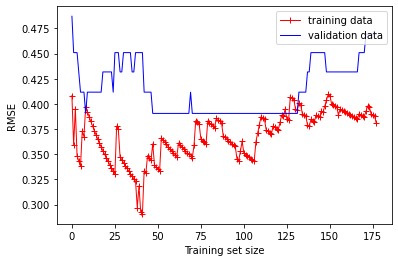

In [68]:
plotter.plot_learning_curves(log, X_train, y_train, X_test, y_test)

### Support Vector Machine (SVM)

Support Vector Machine model metrics:

The optimal SVC model parameters are: C = 1, kernel = poly
Confusion matrix: 
 [[ 9  7]
 [ 0 43]]
Accuracy: 0.8813559322033898
Recall: 1.0
F1 Score: 0.924731182795699
Precision Score: 0.86
None


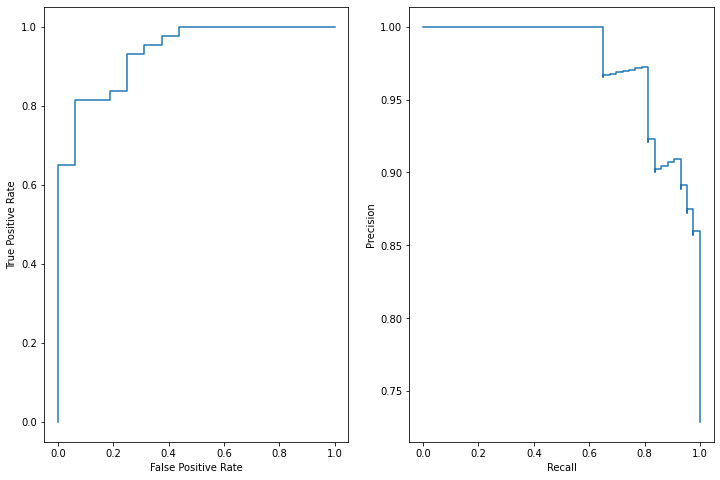

In [69]:
# Support Vector Machine
svm = model.svc_model()
model.ROC_curve(svm)

test  acc: 0.864406779661017
train acc: 0.9663461538461539


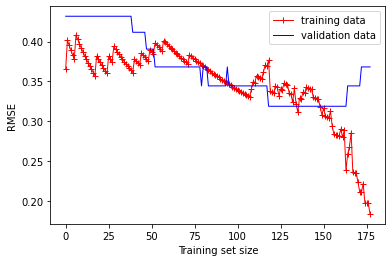

In [70]:
plotter.plot_learning_curves(svm, X_train, y_train, X_test, y_test)

### Naive Bayes

In [71]:
# Naive Bayes
gnb = model.gnb_model()

Naive Bayes model metrics:
Confusion matrix: 
 [[13  3]
 [ 8 35]]
Accuracy: 0.8135593220338984
Recall: 0.813953488372093
F1 Score: 0.8641975308641974
Precision Score: 0.9210526315789473
None


test  acc: 0.7966101694915254
train acc: 0.8221153846153846


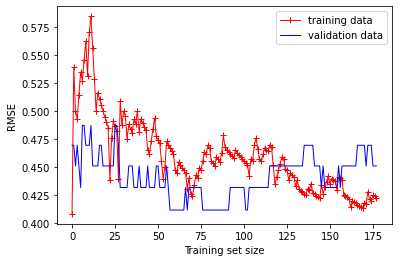

In [72]:
plotter.plot_learning_curves(gnb, X_train, y_train, X_test, y_test)

As expected, the dummy model, where all people are predicted to have PD, has a recall of 100%. The Decision tree (95%), Logistic regression (95%), and Naive Bayes (81%) have worse recall, while SVM also has a recall of 100%. Additionally, the SVM has improved accuracy (88% vs 73%), precision (86% vs 73%) and F1 (92% vs 84%) than the dummy model.

When analyzing the learning curves of the models, Naive Bayes performs the best: the RMSE of training and validation converge downward, indicating good performance with increasing samples. The SVM RMSE does not converge at all and seems to diverge with larger training set size, which indicated overfitting. The other models' learning curves show no convergence of the RMSEs (dummy and decision tree), or converging at a high RMSE (Logistic Regression).

## Conclusion

The SVM model is the classifier model for high recall, with a higher precision and accuracy than the dummy model. However, Naive Bayes may perform better when applied outside of this data; it is better generalizable.

Additionally, the downside of the SVM model is that we cannot visualize it: The model splits data in a 10-dimensional space, one for each feature. Another way to create a hopefully better model is with ensemble modelling: combining multiple models to create a new, superior model. For this data, Bagging is an especially interesting option to use. Bagging aggregates N-classifiers from different samples of the training set. This reduces variance and overfitting. Because we have a small sample size, using Bagging can help generalize the model better.

# Create ensemble model

In [73]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

### Bagging SVM

In [75]:
# Bagging SVM with the optimal hyperparameters found in the previous step
bg_svm = BaggingClassifier(SVC(kernel='poly'), max_features = 1.0, max_samples = 0.5) 
bg_svm.fit(X_train, y_train)

BaggingClassifier(base_estimator=SVC(kernel='poly'), max_samples=0.5)

[[11  5]
 [ 1 42]]
              precision    recall  f1-score   support

           0       0.92      0.69      0.79        16
           1       0.89      0.98      0.93        43

    accuracy                           0.90        59
   macro avg       0.91      0.83      0.86        59
weighted avg       0.90      0.90      0.89        59

test  acc: 0.8983050847457628
train acc: 0.8846153846153846


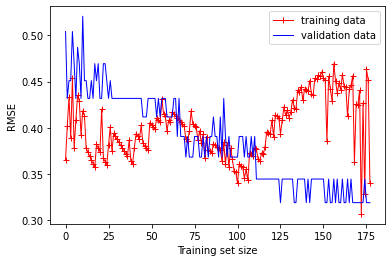

In [76]:
y_pred = bg_svm.predict(X_test)
plotter.evaluate(y_test, y_pred, X_test, bg_svm)
plotter.plot_learning_curves(bg_svm, X_train, y_train, X_test, y_test)

Bagging the SVM model does not improve its performance; After a training size of 100 it begins to underfit the data. The bagging the decision and the random forest classifier (fitting multiple decision trees) tree may also work, as it could improve the performance compared to one decision tree

### Bagging Decision Tree

In [77]:
bg_dtr = BaggingClassifier(DecisionTreeClassifier(), max_features = 1.0, max_samples = 0.5) 
bg_dtr.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.5)

[[14  2]
 [ 8 35]]
              precision    recall  f1-score   support

           0       0.64      0.88      0.74        16
           1       0.95      0.81      0.88        43

    accuracy                           0.83        59
   macro avg       0.79      0.84      0.81        59
weighted avg       0.86      0.83      0.84        59

test  acc: 0.7966101694915254
train acc: 0.9567307692307693


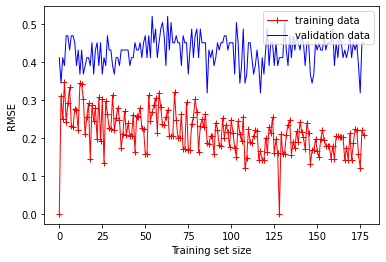

In [78]:
y_pred = bg_dtr.predict(X_test)
plotter.evaluate(y_test, y_pred, X_test, bg_dtr)
plotter.plot_learning_curves(bg_dtr, X_train, y_train, X_test, y_test)

### Random Forest Classifier

In [79]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier

In [80]:
rf = RandomForestClassifier(n_estimators = 10)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

[[13  3]
 [ 6 37]]
              precision    recall  f1-score   support

           0       0.68      0.81      0.74        16
           1       0.93      0.86      0.89        43

    accuracy                           0.85        59
   macro avg       0.80      0.84      0.82        59
weighted avg       0.86      0.85      0.85        59

test  acc: 0.8813559322033898
train acc: 0.9951923076923077


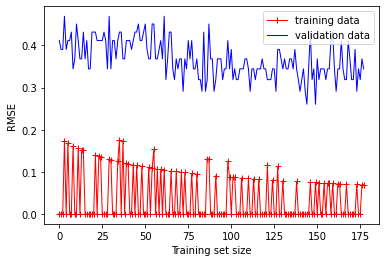

In [81]:
y_pred = rf.predict(X_test)
plotter.evaluate(y_test, y_pred, X_test, rf)
plotter.plot_learning_curves(rf, X_train, y_train, X_test, y_test)

These models also do not outperform the original SVM model: The recall is slightly worse and by inspecting the RMSE it is clear it overfits the training data.

Overall, Bagging does not improve the model. Therefore, next we will test a stacking of multiple models. First, we will test stacking the best three individual classifiers: SVM, Naive Bayes, and Logistic Regression.

### Stacking SVM, Naive Bayes and Logistic Regression

In [82]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
estimators = [('log', log), ('svm', svm), ('gnb', gnb)]
sclf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
sclf.fit(X_train, y_train)

StackingClassifier(estimators=[('log',
                                LogisticRegression(C=1, random_state=14,
                                                   solver='liblinear')),
                               ('svm',
                                SVC(C=1, kernel='poly', random_state=14)),
                               ('gnb', GaussianNB())],
                   final_estimator=LogisticRegression())

[[12  4]
 [ 5 38]]
              precision    recall  f1-score   support

           0       0.71      0.75      0.73        16
           1       0.90      0.88      0.89        43

    accuracy                           0.85        59
   macro avg       0.81      0.82      0.81        59
weighted avg       0.85      0.85      0.85        59

test  acc: 0.847457627118644
train acc: 0.9855769230769231


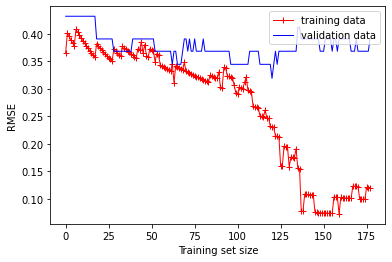

In [83]:
y_pred = sclf.predict(X_test)
plotter.evaluate(y_test, y_pred, X_test, sclf)
plotter.plot_learning_curves(sclf, X_train, y_train, X_test, y_test)

### Stacking optimized SVM, Naive Bayes, Decision Tree and Logistic Regression

In [84]:
estimators = [('log', log), ('svm', svm), ('gnb', gnb), ('dtr', dtr)]
sclf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
sclf.fit(X_train, y_train)

StackingClassifier(estimators=[('log',
                                LogisticRegression(C=1, random_state=14,
                                                   solver='liblinear')),
                               ('svm',
                                SVC(C=1, kernel='poly', random_state=14)),
                               ('gnb', GaussianNB()),
                               ('dtr', DecisionTreeClassifier(max_depth=2))],
                   final_estimator=LogisticRegression())

[[12  4]
 [ 5 38]]
              precision    recall  f1-score   support

           0       0.71      0.75      0.73        16
           1       0.90      0.88      0.89        43

    accuracy                           0.85        59
   macro avg       0.81      0.82      0.81        59
weighted avg       0.85      0.85      0.85        59

test  acc: 0.847457627118644
train acc: 0.9855769230769231


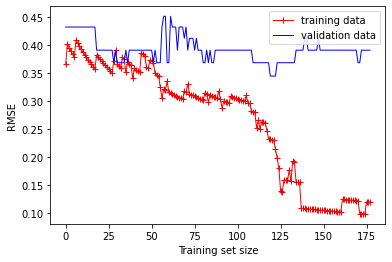

In [85]:
y_pred = sclf.predict(X_test)
plotter.evaluate(y_test, y_pred, X_test, sclf)
plotter.plot_learning_curves(sclf, X_train, y_train, X_test, y_test)

Combining the previously optimized models heavily overfits the data: therefore, next we can try to use the standard classifiers to see if that improves the performance

### Stacking standard SVM, Naive Bayes, Decision Tree and Logistic Regression

In [86]:
# Create standard classifiers
from sklearn.naive_bayes import GaussianNB
lg = LogisticRegression().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)
svm = SVC(kernel='rbf').fit(X_train, y_train)
gnb = GaussianNB().fit(X_train, y_train)

In [87]:
estimators = [('dt', dt), ('lg',lg), ('svm', svm), ('gnb', gnb)]
sclf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
sclf.fit(X_train, y_train)

StackingClassifier(estimators=[('dt', DecisionTreeClassifier()),
                               ('lg', LogisticRegression()), ('svm', SVC()),
                               ('gnb', GaussianNB())],
                   final_estimator=LogisticRegression())

[[12  4]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        16
           1       0.91      0.95      0.93        43

    accuracy                           0.90        59
   macro avg       0.88      0.85      0.87        59
weighted avg       0.90      0.90      0.90        59

test  acc: 0.8813559322033898
train acc: 0.9951923076923077


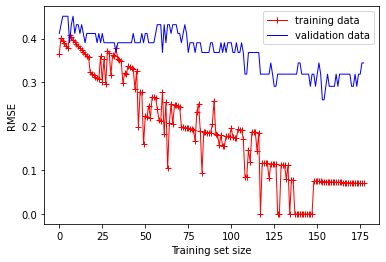

In [88]:
y_pred = sclf.predict(X_test)
plotter.evaluate(y_test, y_pred, X_test, sclf)
plotter.plot_learning_curves(sclf, X_train, y_train, X_test, y_test)

This stacking model slightly outperforms SVM on the F1 score (91% vs 93%), while the recall is 5% lower (95% vs 100%). Because there is still not an ensemble model that clearly outperforms the original model(s), the last two ensemble options will also be looked at: a Voting Classifier and Gradient Boost.

### Voting Classifier

In [92]:
evc = VotingClassifier(estimators = [('dt', dt), ('lg',lg), ('svm', svm), ('gnb', gnb)], voting = 'hard')
evc.fit(X_train, y_train)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier()),
                             ('lg', LogisticRegression()), ('svm', SVC()),
                             ('gnb', GaussianNB())])

[[14  2]
 [ 7 36]]
              precision    recall  f1-score   support

           0       0.67      0.88      0.76        16
           1       0.95      0.84      0.89        43

    accuracy                           0.85        59
   macro avg       0.81      0.86      0.82        59
weighted avg       0.87      0.85      0.85        59

test  acc: 0.864406779661017
train acc: 0.9375


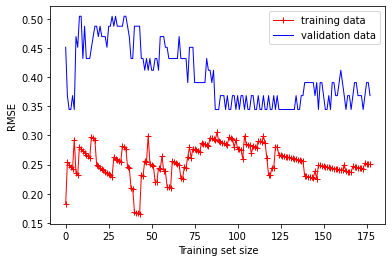

In [93]:
y_pred = evc.predict(X_test)
plotter.evaluate(y_test, y_pred, X_test, evc)
plotter.plot_learning_curves(evc, X_train, y_train, X_test, y_test)

### Gradient Boosting

In [96]:
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier(random_state=0)
grad.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

[[14  2]
 [ 4 39]]
              precision    recall  f1-score   support

           0       0.78      0.88      0.82        16
           1       0.95      0.91      0.93        43

    accuracy                           0.90        59
   macro avg       0.86      0.89      0.88        59
weighted avg       0.90      0.90      0.90        59

test  acc: 0.8983050847457628
train acc: 1.0


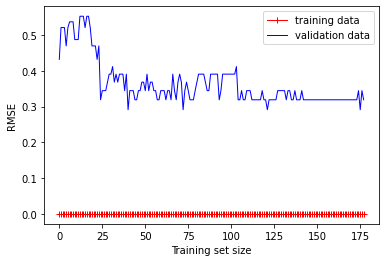

In [98]:
y_pred = grad.predict(X_test)
plotter.evaluate(y_test, y_pred, X_test, grad)
plotter.plot_learning_curves(grad, X_train, y_train, X_test, y_test)

Again there is no advantage to these ensemble models to the original SVM or Naive Bayes model, as it has comparable/slightly worse performance, while being much more computationally heavy.

# Final conclusions

This dataset with voice characteristics revealed that a subset of features that can predict Parkinsons Disease with a high recall and accuracy. The subset was upsampled to create balanced groups, and recall was chosen as the primary measure of performance. A Support Vector Machine classifier, with a regularization parameter C of 1 and a polynomial kernel had a recall of 100% and 86% precision. Using ensemble models to create meta-classifiers did not improve performance enough to justify the increased calculations for them.